In [45]:
import numpy as np
import matplotlib.pyplot as plt
import src.utils as utils
import seaborn as sns
from dtaidistance import dtw
from tqdm import tqdm
import src.dtw as dtw
from joblib import Parallel, delayed

In [3]:
# Path of the train and test dataset
train_set_path = 'UCRArchive_2018/InsectWingbeatSound/InsectWingbeatSound_TRAIN.tsv'
test_set_path = 'UCRArchive_2018/InsectWingbeatSound/InsectWingbeatSound_TEST.tsv'

# Extract the time series and classes for train and test set
train_labels, train_ts = utils.extract_ts_from_file(train_set_path)
test_labels, test_ts = utils.extract_ts_from_file(test_set_path)

In [4]:
print(f"L'ensemble d'entrainement est composé de {train_ts.shape[0]} échantillons de longueur {train_ts.shape[1]}")
print(f"L'ensemble de test est composé de {test_ts.shape[0]} échantillons de longueur {test_ts.shape[1]}")

L'ensemble d'entrainement est composé de 220 échantillons de longueur 256
L'ensemble de test est composé de 1980 échantillons de longueur 256


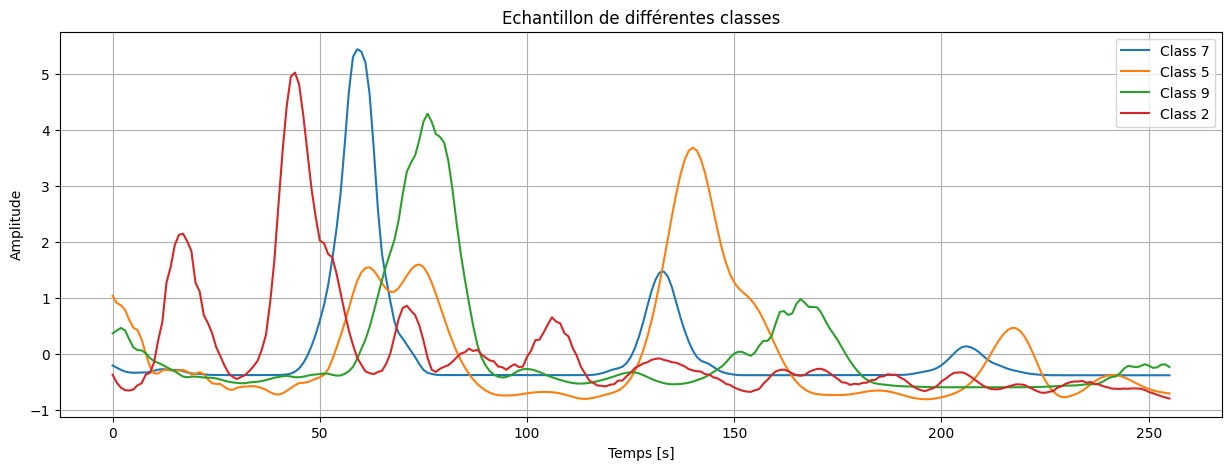

In [5]:
# Visualisons certains signaux
plt.figure(figsize = (15, 5))

plt.plot(train_ts[0], label = f"Class {train_labels[0]}")
plt.plot(train_ts[1], label = f"Class {train_labels[1]}")
plt.plot(train_ts[2], label = f"Class {train_labels[2]}")
plt.plot(train_ts[3], label = f"Class {train_labels[3]}")
plt.legend()
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.title('Echantillon de différentes classes')
plt.grid()
plt.show()

In [42]:
def compute_dtw(i, j):
    return i, j, dtw.get_dtw_distance(train_ts[i], train_ts[j])

train_set_size = len(train_labels)

DTW_distance_matrix = np.zeros([train_set_size, train_set_size])

results = Parallel(n_jobs=-1)(delayed(compute_dtw)(i, j) 
                              for i in tqdm(range(train_set_size), disable = False) 
                              for j in range(i, train_set_size))

# Remplissage de la matrice à partir des résultats
for i, j, dist in results:
    DTW_distance_matrix[i, j] = dist
    DTW_distance_matrix[j, i] = dist

100%|██████████| 220/220 [19:02<00:00,  5.19s/it]


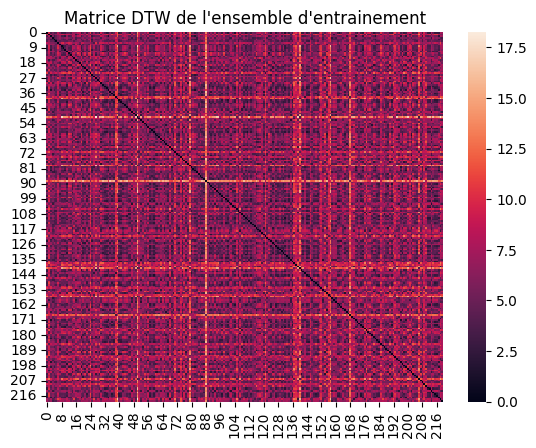

In [44]:
sns.heatmap(DTW_distance_matrix)
plt.title("Matrice DTW de l'ensemble d'entrainement")
plt.show()